In [1]:
import numpy as np
from sklearn import cross_validation, datasets, svm, linear_model
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve


In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print type(X)

<type 'numpy.ndarray'>


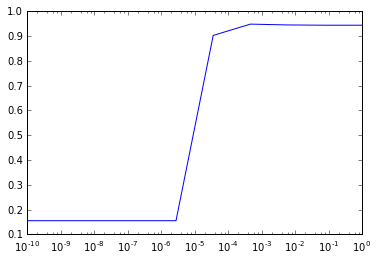

In [3]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

kfolds_strat=cross_validation.StratifiedKFold(y, n_folds=3)
score_vector=[]
for C in C_s:
    svc.C=C
    this_mean_score = np.mean(cross_validation.cross_val_score(svc, X, y, cv=kfolds_strat, n_jobs=-1))
    #this will compute score based on cross validation. Basically this FITS on train and SCORES on test (cv set) itself.
    score_vector.append(this_mean_score)
plt.semilogx(C_s, score_vector)
plt.show()

#### How to estimate the best hyper-param and do stratified folding AFTER best param is found per fold(?)
Say clf is an object of GridSearchCV class  
- does clf find best hyperparam per fold run? 
  -       each run has a train and test vector. During fit only train data is passed to clf, only on which clf can find best param.
    -             so during each fold run, new train data is passed --> does it mean every fold run new hyperparam is found
- If above is true, how to get hyperparam for each run?

In [4]:
#Search grid for best C --> find score with best C with stratified cross validation strategy
kfolds_strat_gridsearch=cross_validation.StratifiedKFold(y, n_folds=10)
clf=GridSearchCV(estimator=svc, param_grid=dict(C=C_s))
print cross_validation.cross_val_score(clf, X, y, cv=kfolds_strat_gridsearch, n_jobs=-1)

[ 0.93513514  0.9726776   0.9281768   0.96111111  0.95530726  0.99441341
  0.98324022  0.97752809  0.92655367  0.94318182]


print clf.best_score_  
print clf.best_estimator_.C
- above 2 lines in case fit is performed directly on GridSearchCV object. 
- GridSearchCV does 3 fold CV (splits data it is given, into train and test sets, itself) and finds best hyperparam

#### Find alpha for Lasso model of linear regression class